In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, 
    precision_recall_curve, auc, f1_score, roc_curve, accuracy_score,
    precision_score, recall_score, 
   
)
import xgboost as xgb
import lightgbm as lgb
from imblearn.over_sampling import SMOTE, ADASYN
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [23]:
df = pd.read_csv('final_dataset.csv')

In [24]:
num_features = [
    "application_hour",
    "application_day_of_week",
    "account_open_year",
    "num_login_sessions",
    "num_customer_service_calls",
    "has_mobile_app",
    "paperless_billing",
    "monthly_income",
    "annual_income",
    "employment_length",
    "monthly_payment",
    "debt_to_income_ratio",
    "debt_service_ratio",
    "payment_to_income_ratio",
    "loan_to_annual_income",
    "loan_to_value_ratio",
    "credit_utilization",
    "revolving_balance",
    "credit_usage_amount",
    "available_credit",
    "total_monthly_debt_payment",
    "annual_debt_payment",
    "total_debt_amount",
    "total_credit_limit",
    "loan_amount",
    "loan_term",
    "interest_rate",
    "credit_score",
    "num_credit_accounts",
    "oldest_credit_line_age",
    "oldest_account_age_months",
    "num_delinquencies_2yrs",
    "num_inquiries_6mo",
    "recent_inquiry_count",
    "num_public_records",
    "num_collections",
    "account_diversity_index",
    "age",
    "housing_price_index",
    "random_noise_1"
]

cat_features = [
    "loan_purpose",
    "employment_type",
    "education",
    "marital_status",
    "preferred_contact",
    "account_status_code",
    "referral_code"
]
num_features = [f for f in num_features if f in df.columns]
cat_features = [f for f in cat_features if f in df.columns]

print(f"Using {len(num_features)} numerical + {len(cat_features)} categorical features")
print("Numerical:", num_features)
print("Categorical:", cat_features)


Using 40 numerical + 7 categorical features
Numerical: ['application_hour', 'application_day_of_week', 'account_open_year', 'num_login_sessions', 'num_customer_service_calls', 'has_mobile_app', 'paperless_billing', 'monthly_income', 'annual_income', 'employment_length', 'monthly_payment', 'debt_to_income_ratio', 'debt_service_ratio', 'payment_to_income_ratio', 'loan_to_annual_income', 'loan_to_value_ratio', 'credit_utilization', 'revolving_balance', 'credit_usage_amount', 'available_credit', 'total_monthly_debt_payment', 'annual_debt_payment', 'total_debt_amount', 'total_credit_limit', 'loan_amount', 'loan_term', 'interest_rate', 'credit_score', 'num_credit_accounts', 'oldest_credit_line_age', 'oldest_account_age_months', 'num_delinquencies_2yrs', 'num_inquiries_6mo', 'recent_inquiry_count', 'num_public_records', 'num_collections', 'account_diversity_index', 'age', 'housing_price_index', 'random_noise_1']
Categorical: ['loan_purpose', 'employment_type', 'education', 'marital_status', '

In [25]:
X = df[num_features + cat_features].copy()
y = df['default'].copy()

print(f"Feature matrix: {X.shape}")
print(f"Default rate: {y.mean()*100:.2f}%")

Feature matrix: (89999, 47)
Default rate: 5.10%


In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)



AUC Score: 0.8631

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     25622
           1       0.81      0.14      0.24      1378

    accuracy                           0.95     27000
   macro avg       0.88      0.57      0.61     27000
weighted avg       0.95      0.95      0.94     27000



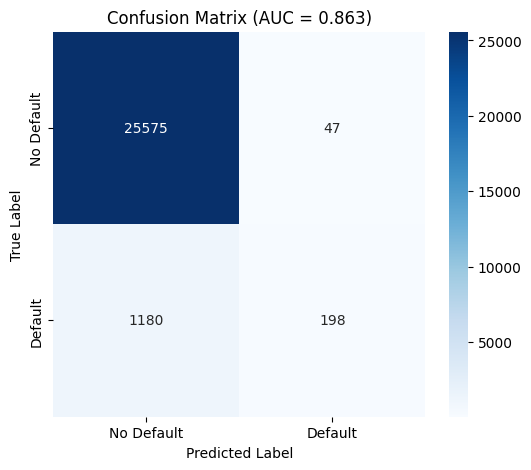

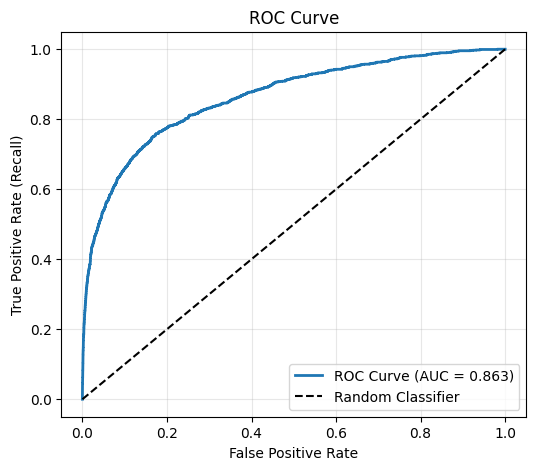

                            feature  importance
12               debt_service_ratio    0.046367
27                     credit_score    0.040163
40            loan_type_credit card    0.028936
8                     annual_income    0.026325
37                              age    0.026295
13          payment_to_income_ratio    0.025248
11             debt_to_income_ratio    0.023614
43               loan_type_personal    0.022850
31           num_delinquencies_2yrs    0.021682
7                    monthly_income    0.020746
34               num_public_records    0.020287
44  loan_purpose_Debt Consolidation    0.016222
28              num_credit_accounts    0.014823
16               credit_utilization    0.013335
25                        loan_term    0.012797


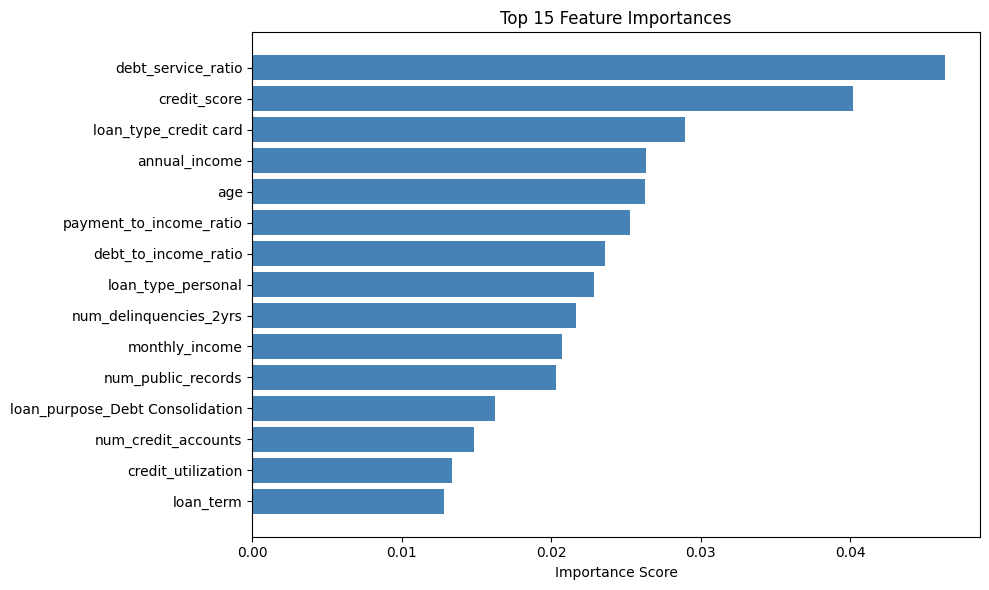

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report
from xgboost import plot_importance

y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nAUC Score: {auc:.4f}\n")

y_pred = (y_pred_proba > 0.5).astype(int)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix (AUC = {auc:.3f})')
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


import pandas as pd
import numpy as np

feature_names = pipeline.named_steps['preprocess'].transformers_[0][2] + list(
    pipeline.named_steps['preprocess'].transformers_[1][1].get_feature_names_out()
)
importances = xgb_model.feature_importances_

feat_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False).head(15)

print(feat_imp_df)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['feature'][::-1], feat_imp_df['importance'][::-1], color='steelblue')
plt.xlabel('Importance Score')
plt.title('Top 15 Feature Importances')
plt.tight_layout()
plt.show()

